In [1]:

import os
os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from tensorflow.keras.metrics import AUC
from tensorflow import keras

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from imblearn.pipeline import Pipeline as smote_pipeline

import joblib


Using plaidml.keras.backend backend.


In [3]:
df = pd.read_csv('../data/clean_data.csv')
df

,body_length,country,currency,delivery_method,description,fb_published,has_analytics,has_header,has_logo,listed,...,total_tickets_available,number_of_payouts,avg_quantity_sold,payee_name_in_org_name,venue_country_is_source_country,avg_cost_per_ticket,days_to_event,event_length,pop_country,fraud
0,3852.0,US,USD,0.0,0.723935,0,0,1.0,0,y,...,920.0,0.0,0.000000,True,True,0.226449,33.0,0.0,True,True
1,3499.0,US,USD,1.0,0.091689,0,0,0.0,1,n,...,100.0,49.0,12.500000,True,True,0.350000,28.0,0.0,True,False
2,2601.0,US,USD,1.0,0.095273,0,0,NaN,0,y,...,48.0,36.0,48.000000,True,True,1.948125,53.0,0.0,True,False
3,12347.0,IE,EUR,1.0,0.293555,0,0,0.0,1,y,...,30000.0,21.0,9.666667,True,False,0.000456,0.0,322.0,False,False
4,2417.0,US,USD,0.0,0.308245,1,0,0.0,0,y,...,264.0,49.0,4.875000,False,True,0.385417,63.0,0.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14332,667.0,US,USD,0.0,0.966564,0,0,NaN,1,n,...,400.0,0.0,0.000000,True,True,0.112500,10.0,0.0,True,True
14333,5812.0,US,USD,1.0,0.007159,0,0,1.0,0,y,...,3256.0,5.0,78.500000,False,True,0.013283,55.0,0.0,True,False
14334,557.0,NaN,USD,0.0,0.202241,1,0,0.0,1,y,...,148.0,1.0,0.200000,True,False,0.283784,89.0,0.0,False,False
14335,10873.0,US,USD,0.0,0.042906,0,0,0.0,1,y,...,100.0,128.0,0.000000,True,True,0.793300,5.0,0.0,True,False


In [4]:
pipe = joblib.load('../models/prediction_pipe.joblib')
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['body_length', 'description',
                                                   'name_length', 'num_payouts',
                                                   'user_age',
                                                   'avg_ticket_price',
                                                   'total_tickets_available',
                                                   'number_of_payouts',
                                                   'avg_quantity_sold',
                                                   'avg_cost_per_ticket',
                                                   'days_to_event',
                                                   'even...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'currency',
                                                   'delivery_method',
                                                   'fb_published',
                                                   'has_analytics',
                                                   'has_header', 'has_logo',
                                                   'listed', 'payout_type',
                                                   'show_map', 'venue_country',
                                                   'venue_state',
                                                   'payee_name_in_org_name',
                                                   'venue_country_is_source_country',
                                                   'pop_country'])])),
                ('smoter', SMOTE(n_jobs=-1)),
                ('cls', RandomForestClassifier(n_estimators=1000, n_jobs=-1))])

In [5]:
trans = pipe[:-2]
trans

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('numeric_transformer',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('std',
                                                                   StandardScaler())]),
                                                  ['body_length', 'description',
                                                   'name_length', 'num_payouts',
                                                   'user_age',
                                                   'avg_ticket_price',
                                                   'total_tickets_available',
                                                   'number_of_payouts',
                                                   'avg_quantity_sold',
                                                   'avg_cost_per_ticket',
                                                   'days_to_event',
                                                   'even...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['country', 'currency',
                                                   'delivery_method',
                                                   'fb_published',
                                                   'has_analytics',
                                                   'has_header', 'has_logo',
                                                   'listed', 'payout_type',
                                                   'show_map', 'venue_country',
                                                   'venue_state',
                                                   'payee_name_in_org_name',
                                                   'venue_country_is_source_country',
                                                   'pop_country'])]))])

In [6]:
X = df.drop('fraud', axis=1)
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   stratify=y)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11469 entries, 7054 to 13526
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   body_length                      11469 non-null  float64
 1   country                          11145 non-null  object 
 2   currency                         11469 non-null  object 
 3   delivery_method                  11456 non-null  float64
 4   description                      11469 non-null  float64
 5   fb_published                     11469 non-null  int64  
 6   has_analytics                    11469 non-null  int64  
 7   has_header                       7129 non-null   float64
 8   has_logo                         11469 non-null  int64  
 9   listed                           11469 non-null  object 
 10  name_length                      11469 non-null  float64
 11  num_payouts                      11469 non-null  float64
 12  payout_type    

In [ ]:
pipe.fit_resample(X_train, y_train)


In [ ]:
X_train_sm, y_train_sm = trans.fit_resample(X_train, y_train)
X_train_sm.shape

In [ ]:
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_train_sm, y_train_sm, test_size=0.20)

In [ ]:
(y_train.value_counts()/y_train.shape[0]).values

In [ ]:
def model(num_hidden_nodes=64):
    nn = Sequential()
    nn.add(Dense(num_hidden_nodes, activation='relu', input_dim=563))
    nn.add(Dropout(rate=.05))
    nn.add(Dense(num_hidden_nodes, activation='relu'))
    nn.add(Dropout(rate=.10))
    nn.add(Dense(1, activation='sigmoid'))
    nn.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0001), metrics=[AUC()])
    return nn


In [ ]:
clf = KerasClassifier(model, epochs=50, batch_size=10, verbose=1)

In [ ]:
weights = (y_train.value_counts()/y_train.shape[0]).values
class_weights = {0: weights[0],
                1: weights[1]}

history = clf.fit(trans[:-1].transform(X_train).toarray(), y_train, validation_split=0.2, class_weight=class_weights)

In [ ]:
X_test_processed = trans[:-1].transform(X_test)

In [ ]:
test_predictions = clf.predict(X_test_processed)

In [ ]:
print(f1_score(y_test, test_predictions))
print(roc_auc_score(y_test, test_predictions))

In [ ]:
from imblearn.keras import BalancedBatchGenerator
from imblearn.under_sampling import NearMiss


In [43]:
X_train_transformed = trans[:-1].transform(X_train).toarray()
y_train_transformed = y_train.values.reshape(-1, 1)

model = keras.Sequential([
    Dense(64, activation='relu', input_dim=563),
    Dropout(rate=.25),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.00001),
             metrics=[AUC()])
model.fit(X_train_transformed, y_train_transformed, epochs=50, batch_size=10)

ValueError: not enough values to unpack (expected 2, got 0)

In [14]:
neg, pos = np.bincount(y_train)
total = neg + pos
print(f'Examples:\n    Total: {total}\n    Positive: {pos} {100*pos/total:.2f}% of total')

Examples:
    Total: 9175
    Positive: 827 9.01% of total


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train)

In [9]:
train_features = trans.fit_transform(X_train)
val_features = trans.transform(X_val)
test_features = trans.transform(X_test)

train_features = np.clip(train_features.toarray(), -5, 5)
val_features = np.clip(val_features.toarray(), -5, 5)
test_features = np.clip(test_features.toarray(), -5, 5)


In [13]:
train_features.shape

(9175, 520)

In [96]:
METRICS = [
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc')
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid', bias_initializer=output_bias)
    ])
    
    model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=metrics)
    
    return model


In [101]:
EPOCHS=500
BATCH_SIZE=1835

early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.001,
        verbose=1,
        patience=40,
        mode='auto',
        restore_best_weights=True)

model = make_model()
# model.summary()

In [102]:
initial_bias = np.log([pos/neg])
initial_bias

array([-2.31197257])

In [103]:
model = make_model(output_bias=initial_bias)
history = model.fit(
    train_features,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, y_val),
    verbose=2
)

Epoch 1/500
5/5 - 0s - loss: 0.3093 - precision: 0.8856 - recall: 0.1721 - auc: 0.6515 - val_loss: 0.3031 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/500
5/5 - 0s - loss: 0.3057 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4872 - val_loss: 0.3031 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 3/500
5/5 - 0s - loss: 0.3041 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5035 - val_loss: 0.3031 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 4/500
5/5 - 0s - loss: 0.3033 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5055 - val_loss: 0.3031 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 5/500
5/5 - 0s - loss: 0.3029 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.5090 - val_loss: 0.3031 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 6/500
5/5 - 0s - loss: 0.3029 - precision: 0.0000e+00 - recall: 0.0000e+00 - 

Epoch 47/500
5/5 - 0s - loss: 0.1543 - precision: 0.9311 - recall: 0.6046 - auc: 0.9082 - val_loss: 0.2876 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8611
Epoch 48/500
5/5 - 0s - loss: 0.1650 - precision: 0.9331 - recall: 0.6239 - auc: 0.9092 - val_loss: 0.2913 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8084
Epoch 49/500
5/5 - 0s - loss: 0.1554 - precision: 0.9451 - recall: 0.6239 - auc: 0.9027 - val_loss: 0.2940 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7844
Epoch 50/500
5/5 - 0s - loss: 0.1522 - precision: 0.9477 - recall: 0.6131 - auc: 0.9224 - val_loss: 0.2946 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7749
Epoch 51/500
5/5 - 0s - loss: 0.1496 - precision: 0.9368 - recall: 0.6094 - auc: 0.9026 - val_loss: 0.2894 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8492
Epoch 52/500
5/5 - 0s - loss: 0.1560 - precision: 0.9270 - recall: 0.6300 - auc: 0.9040 - val_loss: 0.2902 - v

Epoch 94/500
5/5 - 0s - loss: 0.1226 - precision: 0.9697 - recall: 0.6965 - auc: 0.9005 - val_loss: 0.2655 - val_precision: 1.0000 - val_recall: 0.0048 - val_auc: 0.8351
Epoch 95/500
5/5 - 0s - loss: 0.1184 - precision: 0.9747 - recall: 0.7001 - auc: 0.9082 - val_loss: 0.2515 - val_precision: 1.0000 - val_recall: 0.0386 - val_auc: 0.8663
Epoch 96/500
5/5 - 0s - loss: 0.1156 - precision: 0.9483 - recall: 0.7316 - auc: 0.9177 - val_loss: 0.2491 - val_precision: 1.0000 - val_recall: 0.0386 - val_auc: 0.8662
Epoch 97/500
5/5 - 0s - loss: 0.1200 - precision: 0.9626 - recall: 0.7473 - auc: 0.9226 - val_loss: 0.2574 - val_precision: 1.0000 - val_recall: 0.0242 - val_auc: 0.8541
Epoch 98/500
5/5 - 0s - loss: 0.1118 - precision: 0.9639 - recall: 0.7424 - auc: 0.9237 - val_loss: 0.2666 - val_precision: 1.0000 - val_recall: 0.0048 - val_auc: 0.8541
Epoch 99/500
5/5 - 0s - loss: 0.1153 - precision: 0.9644 - recall: 0.7207 - auc: 0.9227 - val_loss: 0.2709 - val_precision: 1.0000 - val_recall: 0.004

Epoch 142/500
5/5 - 0s - loss: 0.0975 - precision: 0.9593 - recall: 0.7690 - auc: 0.9322 - val_loss: 0.2464 - val_precision: 1.0000 - val_recall: 0.0483 - val_auc: 0.9092
Epoch 143/500
5/5 - 0s - loss: 0.0984 - precision: 0.9650 - recall: 0.7666 - auc: 0.9275 - val_loss: 0.2418 - val_precision: 1.0000 - val_recall: 0.0628 - val_auc: 0.8994
Epoch 144/500
5/5 - 0s - loss: 0.1050 - precision: 0.9632 - recall: 0.7606 - auc: 0.9333 - val_loss: 0.2383 - val_precision: 1.0000 - val_recall: 0.0676 - val_auc: 0.9089
Epoch 145/500
5/5 - 0s - loss: 0.0998 - precision: 0.9622 - recall: 0.7690 - auc: 0.9312 - val_loss: 0.2495 - val_precision: 1.0000 - val_recall: 0.0435 - val_auc: 0.8830
Epoch 146/500
5/5 - 0s - loss: 0.0980 - precision: 0.9748 - recall: 0.7485 - auc: 0.9291 - val_loss: 0.2533 - val_precision: 1.0000 - val_recall: 0.0435 - val_auc: 0.8878
Epoch 147/500
5/5 - 0s - loss: 0.1076 - precision: 0.9794 - recall: 0.7461 - auc: 0.9278 - val_loss: 0.2602 - val_precision: 1.0000 - val_recall:

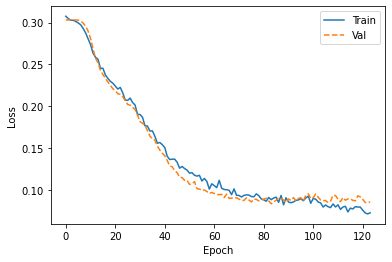

In [70]:
def plot_metrics(history):
    name = 'AUC'
    fig, ax = plt.subplots()
    ax.plot(history.epoch, history.history['loss'], label='Train')
    ax.plot(history.epoch, history.history['val_loss'],
           linestyle='--', label='Val')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    plt.legend()
plot_metrics(history)

In [82]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    print(f"Legitimate Transactions Detected (True Negatives): {cm[0][0]}")
    print(f"Legitimate Transactions Incorrectly Detected (False Positives): {cm[0][1]}")
    print(f"Fraudulent Transactions Missed (False Negatives): {cm[1][0]}")
    print(f"Fraudulent Transactions Detected (True Positives): {cm[1][1]}")
    print(f"Total Fraudulent Transactions: {np.sum(cm[1])}")

Legitimate Transactions Detected (True Negatives): 2592
Legitimate Transactions Incorrectly Detected (False Positives): 17
Fraudulent Transactions Missed (False Negatives): 82
Fraudulent Transactions Detected (True Positives): 177
Total Fraudulent Transactions: 259


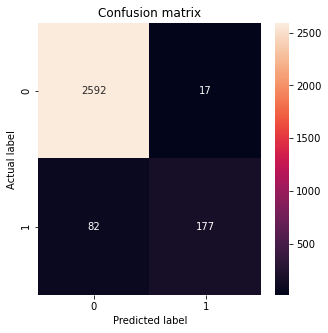

In [50]:
val_predictions = model.predict(val_features)
test_predictions = model.predict(test_features)

plot_cm(y_test, test_predictions)

In [51]:
f1_score(y_test, test_predictions>0.5)

0.781456953642384

In [52]:
val_predictions

array([[0.00228867],
       [0.00256282],
       [0.00452659],
       ...,
       [0.00315782],
       [0.00376287],
       [0.00363755]], dtype=float32)

In [107]:
weight_for_0 = (1 / neg) * (total)/2.0
weight_for_1 = (1 / pos) * (total)/2.0
class_weight = {0: weight_for_0, 1: weight_for_1}

print(weight_for_0)
print(weight_for_1)

0.5495328222328701
5.547158403869407


In [108]:
weighted_model = make_model()

weighted_history = weighted_model.fit(
    train_features,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, y_val),
    class_weight=class_weight,
    verbose=2
)

Epoch 1/500
5/5 - 1s - loss: 0.7044 - precision: 0.0962 - recall: 0.8385 - auc: 0.5943 - val_loss: 0.7754 - val_precision: 0.0902 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 2/500
5/5 - 0s - loss: 0.6982 - precision: 0.0886 - recall: 0.9686 - auc: 0.5338 - val_loss: 0.7653 - val_precision: 0.0902 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/500
5/5 - 0s - loss: 0.6948 - precision: 0.0891 - recall: 0.9794 - auc: 0.5391 - val_loss: 0.7557 - val_precision: 0.0902 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 4/500
5/5 - 0s - loss: 0.6897 - precision: 0.0896 - recall: 0.9879 - auc: 0.5746 - val_loss: 0.7457 - val_precision: 0.0902 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 5/500
5/5 - 0s - loss: 0.6854 - precision: 0.0894 - recall: 0.9879 - auc: 0.6190 - val_loss: 0.7355 - val_precision: 0.0902 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 6/500
5/5 - 0s - loss: 0.6808 - precision: 0.0889 - recall: 0.9807 - auc: 0.6520 - val_loss: 0.7257 - val_precision: 0.0902 - val_recall: 1.0000 - va

Epoch 50/500
5/5 - 0s - loss: 0.2324 - precision: 0.6780 - recall: 0.9190 - auc: 0.9615 - val_loss: 0.1581 - val_precision: 0.9898 - val_recall: 0.4686 - val_auc: 0.9740
Epoch 51/500
5/5 - 0s - loss: 0.2146 - precision: 0.6837 - recall: 0.9407 - auc: 0.9682 - val_loss: 0.1563 - val_precision: 0.9904 - val_recall: 0.4976 - val_auc: 0.9629
Epoch 52/500
5/5 - 0s - loss: 0.2096 - precision: 0.7119 - recall: 0.9383 - auc: 0.9695 - val_loss: 0.1571 - val_precision: 0.9903 - val_recall: 0.4928 - val_auc: 0.9608
Epoch 53/500
5/5 - 0s - loss: 0.2072 - precision: 0.7058 - recall: 0.9311 - auc: 0.9682 - val_loss: 0.1545 - val_precision: 0.9907 - val_recall: 0.5121 - val_auc: 0.9445
Epoch 54/500
5/5 - 0s - loss: 0.2070 - precision: 0.6943 - recall: 0.9420 - auc: 0.9683 - val_loss: 0.1486 - val_precision: 0.9913 - val_recall: 0.5507 - val_auc: 0.9446
Epoch 55/500
5/5 - 0s - loss: 0.2230 - precision: 0.6758 - recall: 0.9250 - auc: 0.9661 - val_loss: 0.1461 - val_precision: 0.9916 - val_recall: 0.570

Epoch 99/500
5/5 - 0s - loss: 0.1758 - precision: 0.6775 - recall: 0.9553 - auc: 0.9763 - val_loss: 0.1163 - val_precision: 0.9578 - val_recall: 0.7681 - val_auc: 0.9658
Epoch 100/500
5/5 - 0s - loss: 0.1801 - precision: 0.6804 - recall: 0.9553 - auc: 0.9761 - val_loss: 0.1116 - val_precision: 0.9432 - val_recall: 0.8019 - val_auc: 0.9749
Epoch 101/500
5/5 - 0s - loss: 0.1855 - precision: 0.6746 - recall: 0.9577 - auc: 0.9727 - val_loss: 0.1134 - val_precision: 0.9429 - val_recall: 0.7971 - val_auc: 0.9679
Epoch 102/500
5/5 - 0s - loss: 0.1650 - precision: 0.7055 - recall: 0.9589 - auc: 0.9778 - val_loss: 0.1117 - val_precision: 0.9444 - val_recall: 0.8213 - val_auc: 0.9698
Epoch 103/500
5/5 - 0s - loss: 0.1851 - precision: 0.6772 - recall: 0.9565 - auc: 0.9721 - val_loss: 0.1109 - val_precision: 0.9405 - val_recall: 0.8406 - val_auc: 0.9740
Epoch 104/500
5/5 - 0s - loss: 0.1744 - precision: 0.6829 - recall: 0.9661 - auc: 0.9756 - val_loss: 0.1135 - val_precision: 0.9435 - val_recall: 

Epoch 147/500
5/5 - 0s - loss: 0.1577 - precision: 0.7100 - recall: 0.9649 - auc: 0.9781 - val_loss: 0.1026 - val_precision: 0.9316 - val_recall: 0.8551 - val_auc: 0.9729
Epoch 148/500
5/5 - 0s - loss: 0.1565 - precision: 0.7495 - recall: 0.9589 - auc: 0.9791 - val_loss: 0.1059 - val_precision: 0.9451 - val_recall: 0.8309 - val_auc: 0.9683
Epoch 149/500
5/5 - 0s - loss: 0.1713 - precision: 0.7215 - recall: 0.9553 - auc: 0.9766 - val_loss: 0.1035 - val_precision: 0.9309 - val_recall: 0.8454 - val_auc: 0.9773
Epoch 150/500
5/5 - 0s - loss: 0.1762 - precision: 0.6197 - recall: 0.9577 - auc: 0.9760 - val_loss: 0.1053 - val_precision: 0.9309 - val_recall: 0.8454 - val_auc: 0.9773
Epoch 151/500
5/5 - 0s - loss: 0.1525 - precision: 0.6794 - recall: 0.9661 - auc: 0.9800 - val_loss: 0.1076 - val_precision: 0.9598 - val_recall: 0.8068 - val_auc: 0.9729
Epoch 152/500
5/5 - 0s - loss: 0.1460 - precision: 0.7407 - recall: 0.9601 - auc: 0.9814 - val_loss: 0.1079 - val_precision: 0.9497 - val_recall:

Epoch 195/500
5/5 - 0s - loss: 0.1500 - precision: 0.7117 - recall: 0.9674 - auc: 0.9802 - val_loss: 0.0976 - val_precision: 0.9091 - val_recall: 0.8696 - val_auc: 0.9749
Epoch 196/500
5/5 - 0s - loss: 0.1360 - precision: 0.7396 - recall: 0.9686 - auc: 0.9842 - val_loss: 0.1007 - val_precision: 0.9365 - val_recall: 0.8551 - val_auc: 0.9704
Epoch 197/500
5/5 - 0s - loss: 0.1463 - precision: 0.7713 - recall: 0.9625 - auc: 0.9802 - val_loss: 0.1023 - val_precision: 0.9399 - val_recall: 0.8309 - val_auc: 0.9707
Epoch 198/500
5/5 - 0s - loss: 0.1503 - precision: 0.7849 - recall: 0.9577 - auc: 0.9779 - val_loss: 0.1033 - val_precision: 0.9355 - val_recall: 0.8406 - val_auc: 0.9728
Epoch 199/500
5/5 - 0s - loss: 0.1595 - precision: 0.7902 - recall: 0.9565 - auc: 0.9751 - val_loss: 0.1018 - val_precision: 0.9271 - val_recall: 0.8599 - val_auc: 0.9727
Epoch 200/500
5/5 - 0s - loss: 0.1539 - precision: 0.7632 - recall: 0.9625 - auc: 0.9759 - val_loss: 0.0993 - val_precision: 0.9223 - val_recall:

Epoch 243/500
5/5 - 0s - loss: 0.1414 - precision: 0.7493 - recall: 0.9613 - auc: 0.9792 - val_loss: 0.0960 - val_precision: 0.9316 - val_recall: 0.8551 - val_auc: 0.9753
Epoch 244/500
5/5 - 0s - loss: 0.1492 - precision: 0.7697 - recall: 0.9577 - auc: 0.9762 - val_loss: 0.0962 - val_precision: 0.9171 - val_recall: 0.8551 - val_auc: 0.9753
Epoch 245/500
Restoring model weights from the end of the best epoch.
5/5 - 0s - loss: 0.1433 - precision: 0.7677 - recall: 0.9589 - auc: 0.9791 - val_loss: 0.0929 - val_precision: 0.9050 - val_recall: 0.8744 - val_auc: 0.9751
Epoch 00245: early stopping


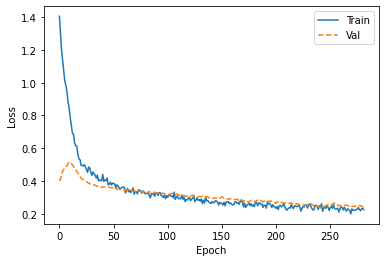

In [105]:
plot_metrics(weighted_history)

Legitimate Transactions Detected (True Negatives): 2575
Legitimate Transactions Incorrectly Detected (False Positives): 34
Fraudulent Transactions Missed (False Negatives): 44
Fraudulent Transactions Detected (True Positives): 215
Total Fraudulent Transactions: 259
0.8449612403100775


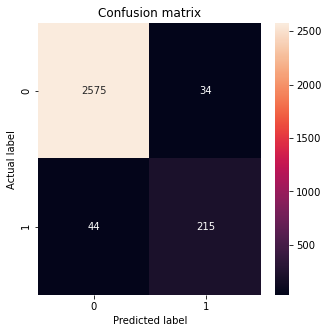

In [116]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)
plot_cm(y_test, test_predictions_weighted, p=0.40)
print(f1_score(y_test, test_predictions_weighted>0.25))